# Rosenblatt Perceptron

### Parameters

In [76]:
IMAGE_HEIGHT = 20
IMAGE_WIDTH = 20
EPOCHS = 10000000

### Importing packages

In [2]:
# Standard packages
import random

# Installed packages
import matplotlib.pyplot as plt

# Local modules
from perceptron import Perceptron
from random_figure import RectangleGenerator, CircleGenerator

### Rectangle image generation

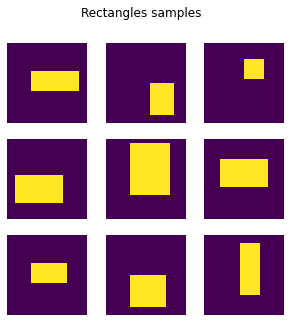

In [3]:
rect_gen = RectangleGenerator()
rect_gen.set_canvas_dimensions(IMAGE_HEIGHT, IMAGE_WIDTH)
rect_gen.set_min_figure(int(IMAGE_HEIGHT*0.20), int(IMAGE_WIDTH*0.20))
rect_gen.set_max_figure(int(IMAGE_HEIGHT*0.70), int(IMAGE_WIDTH*0.70))

# Plot samples
rows, cols = 3, 3
fig, ax = plt.subplots(rows, cols, figsize=(5, 5))
fig.suptitle('Rectangles samples')

for i in range(rows):
    for j in range(cols):
        ax[i, j].imshow(rect_gen.generate())
        ax[i, j].axis('off')

### Circle image generation

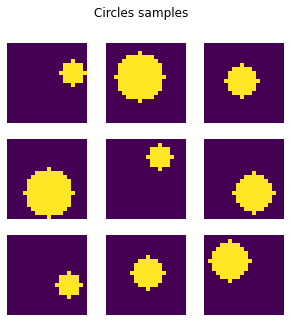

In [4]:
circ_gen = CircleGenerator()
circ_gen.set_canvas_dimensions(IMAGE_HEIGHT, IMAGE_WIDTH)
circ_gen.set_min_figure(int(IMAGE_HEIGHT*0.20), int(IMAGE_WIDTH*0.20))
circ_gen.set_max_figure(int(IMAGE_HEIGHT*0.70), int(IMAGE_WIDTH*0.70))

# Plot samples
rows, cols = 3, 3
fig, ax = plt.subplots(rows, cols, figsize=(5, 5))
fig.suptitle('Circles samples')

for i in range(rows):
    for j in range(cols):
        ax[i, j].imshow(circ_gen.generate())
        ax[i, j].axis('off')

### Training

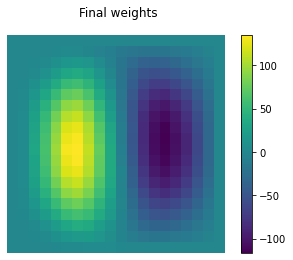

In [77]:
perceptron = Perceptron(bias=6, learning_rate=0.0001, height=IMAGE_HEIGHT, width=IMAGE_WIDTH)

for _ in range(EPOCHS):

    # Generate figure
    is_circle = random.choice([True, False])
    figure = circ_gen.generate() if is_circle else rect_gen.generate()

    # Fit perceptron
    perceptron.fit(should_activate=is_circle, figure=figure)

# Plot final weights
plt.imshow(perceptron.weights)
plt.suptitle('Final weights')
plt.axis('off')
plt.colorbar()

### Tests

In [75]:
SAMPLES = 1000

hits = 0
samples_per_type = int(SAMPLES/2)

# Test circles
for _ in range(samples_per_type):
    new_figure = circ_gen.generate()
    is_activated = perceptron.predict(new_figure)

    if is_activated:
        hits += 1

# Test rectangles
for _ in range(samples_per_type):
    new_figure = rect_gen.generate()
    is_activated = perceptron.predict(new_figure)

    if not is_activated:
        hits += 1

print(f'samples {SAMPLES}')
print(f'hits {hits}')
print(f'accuracy {round(hits/SAMPLES * 100, 3)}%')

samples 1000
hits 555
accuracy 55.5%
